In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from keras.models import Sequential
from glob import glob
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Input, Lambda
from tensorflow.keras.models import Model

In [3]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications import ResNet152, ResNet101

In [4]:
train_path = "APTO/train"
test_path = "APTO/test"

In [5]:
# Resizinig all the images to (224,224)
IMAGE_SIZE = [128,128]

In [6]:
# Scaling all the images between 0 to 1

train_datagen = ImageDataGenerator(rescale = 1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=False)

# Performing only scaling on the test dataset

test_datagen = ImageDataGenerator(rescale=1./255)

In [7]:
train_set = train_datagen.flow_from_directory(train_path,
                                              target_size=(128,128),
                                              batch_size=2,
                                              class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(test_path,
                                            target_size=(128,128),
                                            batch_size=2,
                                            class_mode='categorical')

Found 3229 images belonging to 5 classes.
Found 361 images belonging to 5 classes.


In [8]:
from keras.metrics import Precision, Recall
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.models import Sequential, Model

learning_rate_reduction = ReduceLROnPlateau(
    monitor="val_accuracy", patience=3, verbose=1, factor=0.3, min_lr=0.0000001
)
early_stop = EarlyStopping(
    patience=10,
    verbose=1,
    monitor="val_accuracy",
    mode="max",
    min_delta=0.001,
    restore_best_weights=True,
)

In [63]:
from functools import reduce
 
def Average(lst): 
    return reduce(lambda a, b: a + b, lst) / len(lst) 

In [10]:
from sklearn.metrics import confusion_matrix, det_curve
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,cohen_kappa_score

In [11]:
from imblearn.metrics import specificity_score, sensitivity_score

In [98]:
ML_Model = []
accuracy = []
precision = []
recall = []
f1score = []
fpr = []
fnr = []
spec = []
sens = []
kapa = []
roc = []

#function to call for storing the results
def storeResults(model, a,b,c,d,e,f,g,h,i,j):
    ML_Model.append(model)
    accuracy.append(round(a, 3))
    precision.append(round(b, 3))
    recall.append(round(c, 3))
    f1score.append(round(d, 3))
    fpr.append(round(e, 3))
    fnr.append(round(f, 3))
    spec.append(round(g, 3))
    sens.append(round(h, 3))
    kapa.append(round(i, 3))
    roc.append(round(j, 3))

# ResNet50

In [12]:
res101=ResNet50(input_shape = IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [13]:
x1= Flatten()(res101.output)
prediction1 = Dense(5, activation='softmax')(x1)
model1 = Model(inputs = res101.inputs, outputs = prediction1)
model1.summary()
model1.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=["accuracy"])

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 134, 134, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 64, 64, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 64, 64, 64)   256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [14]:
hist1 = model1.fit(train_set, validation_data=test_set, epochs=30, steps_per_epoch=len(train_set), validation_steps=len(test_set),callbacks=[learning_rate_reduction, early_stop])

Epoch 1/30
1615/1615 [==============================] - 62s 35ms/step - loss: 2.1890 - accuracy: 0.5627 - val_loss: 1.3510 - val_accuracy: 0.6731
Epoch 2/30
1615/1615 [==============================] - 55s 34ms/step - loss: 1.0553 - accuracy: 0.6535 - val_loss: 2.7786 - val_accuracy: 0.6814
Epoch 3/30
1615/1615 [==============================] - 56s 35ms/step - loss: 0.9074 - accuracy: 0.6915 - val_loss: 1.4106 - val_accuracy: 0.6537
Epoch 4/30
1615/1615 [==============================] - 56s 34ms/step - loss: 0.8921 - accuracy: 0.6962 - val_loss: 0.9128 - val_accuracy: 0.6925
Epoch 5/30
1615/1615 [==============================] - 55s 34ms/step - loss: 0.9046 - accuracy: 0.6884 - val_loss: 0.9355 - val_accuracy: 0.6870
Epoch 6/30
1615/1615 [==============================] - 56s 35ms/step - loss: 0.8713 - accuracy: 0.6974 - val_loss: 1.2027 - val_accuracy: 0.7147
Epoch 7/30
1615/1615 [==============================] - 55s 34ms/step - loss: 0.8290 - accuracy: 0.7135 - val_loss: 0.9363 -

In [64]:
y_pred = model1.predict(test_set,verbose=1,steps=len(test_set))

181/181 [==============================] - 2s 10ms/step


In [65]:
y_pred = np.argmax(y_pred,axis=1)
cm1=confusion_matrix(test_set.classes,y_pred)
print(cm1)

[[ 6 11 19  0  0]
 [18 24 56  0  1]
 [21 59 99  0  0]
 [ 5  9 14  0  0]
 [ 3  4 12  0  0]]


In [66]:
fpr, fnr, thresholds = metrics.roc_curve(test_set.classes,y_pred, pos_label=2)

In [67]:
dl1_acc = hist1.history["val_accuracy"]
dl1_prec = precision_score(test_set.classes,y_pred,average='weighted')
dl1_rec = recall_score(test_set.classes,y_pred,average='weighted')
dl1_f1 = f1_score(test_set.classes,y_pred,average='weighted')
dl1_fpr = 2*Average(fpr)
dl1_fnr = 2*Average(fnr)
dl1_spec = specificity_score(test_set.classes,y_pred,average='weighted')
dl1_sens = sensitivity_score(test_set.classes,y_pred,average='weighted')
dl1_kap = cohen_kappa_score(test_set.classes,y_pred)
dl1_roc = metrics.auc(fpr, fnr)

In [99]:
storeResults('ResNet50',dl1_acc[24],dl1_prec,dl1_rec,dl1_f1,dl1_fpr,dl1_fnr,dl1_spec,dl1_sens,dl1_kap,dl1_roc)

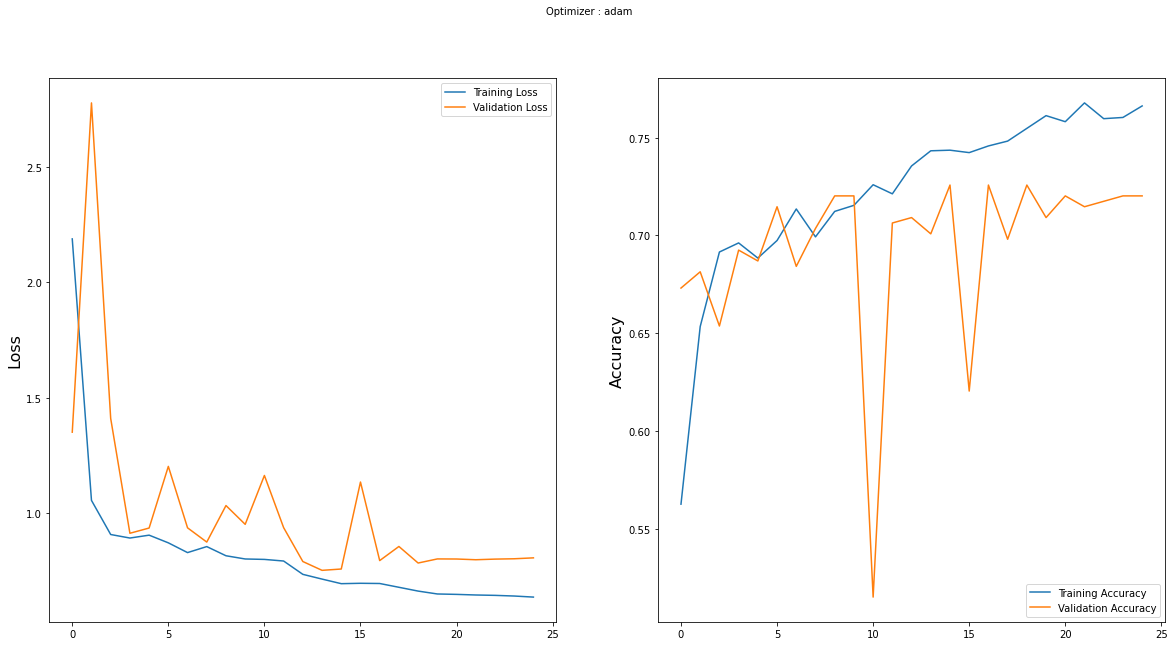

In [19]:
import matplotlib.pyplot as plt

x=hist1
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(x.history['loss'], label='Training Loss')
plt.plot(x.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(x.history['accuracy'], label='Training Accuracy')
plt.plot(x.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

# ResNet152

In [20]:
res101=ResNet152(input_shape = IMAGE_SIZE + [3], weights='imagenet', include_top=False)

x1= Flatten()(res101.output)
prediction1 = Dense(5, activation='softmax')(x1)
model2 = Model(inputs = res101.inputs, outputs = prediction1)
model2.summary()
model2.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=["accuracy"])


Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 134, 134, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 64, 64, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 64, 64, 64)   256         conv1_conv[0][0]                 
____________________________________________________________________________________________

In [21]:
hist2 = model2.fit(train_set, validation_data=test_set, epochs=30, steps_per_epoch=len(train_set), validation_steps=len(test_set),callbacks=[learning_rate_reduction, early_stop])

Epoch 1/30
1615/1615 [==============================] - 165s 97ms/step - loss: 1.8898 - accuracy: 0.5333 - val_loss: 7.2562 - val_accuracy: 0.5568
Epoch 2/30
1615/1615 [==============================] - 153s 95ms/step - loss: 1.2012 - accuracy: 0.6197 - val_loss: 657168.4375 - val_accuracy: 0.4986
Epoch 3/30
1615/1615 [==============================] - 154s 95ms/step - loss: 1.1293 - accuracy: 0.6389 - val_loss: 70.0761 - val_accuracy: 0.6842
Epoch 4/30
1615/1615 [==============================] - 153s 95ms/step - loss: 1.0473 - accuracy: 0.6553 - val_loss: 72.4367 - val_accuracy: 0.4958
Epoch 5/30
1615/1615 [==============================] - 152s 94ms/step - loss: 0.9765 - accuracy: 0.6708 - val_loss: 105.8361 - val_accuracy: 0.5429
Epoch 6/30
1615/1615 [==============================] - 153s 95ms/step - loss: 0.9288 - accuracy: 0.6832 - val_loss: 81.2663 - val_accuracy: 0.4958

Epoch 00006: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
Epoch 7/30
1615/1615 [=====

In [68]:
y_pred = model2.predict(test_set,verbose=1,steps=len(test_set))
y_pred = np.argmax(y_pred,axis=1)
cm1=confusion_matrix(test_set.classes,y_pred)
print(cm1)

181/181 [==============================] - 6s 26ms/step
[[  0  16  20   0   0]
 [  0  35  64   0   0]
 [  1  67 111   0   0]
 [  0  13  15   0   0]
 [  0   8  11   0   0]]


In [69]:
fpr, fnr, thresholds = metrics.roc_curve(test_set.classes,y_pred, pos_label=2)

In [70]:
dl2_acc = hist2.history["val_accuracy"]
dl2_prec = precision_score(test_set.classes,y_pred,average='weighted')
dl2_rec = recall_score(test_set.classes,y_pred,average='weighted')
dl2_f1 = f1_score(test_set.classes,y_pred,average='weighted')
dl2_fpr = 2*Average(fpr)
dl2_fnr = 2*Average(fnr)
dl2_spec = specificity_score(test_set.classes,y_pred,average='weighted')
dl2_sens = sensitivity_score(test_set.classes,y_pred,average='weighted')
dl2_kap = cohen_kappa_score(test_set.classes,y_pred)
dl2_roc = metrics.auc(fpr, fnr)

In [100]:
storeResults('ResNet152',dl2_acc[17],dl2_prec,dl2_rec,dl2_f1,dl2_fpr,dl2_fnr,dl2_spec,dl2_sens,dl2_kap,dl2_roc)

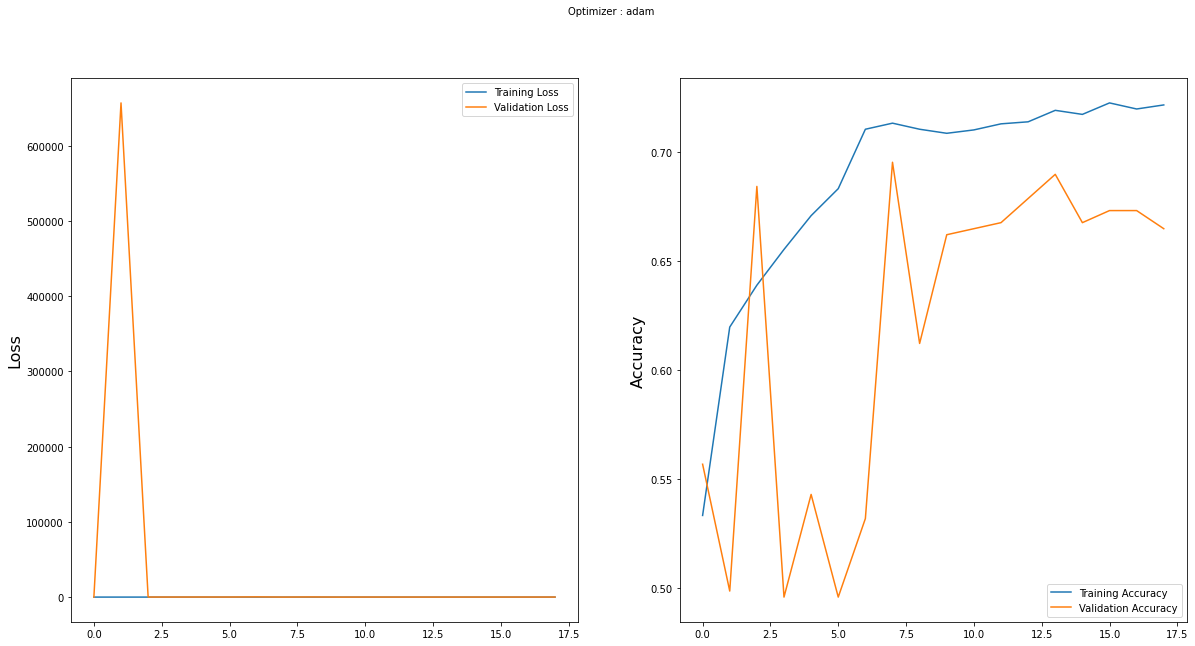

In [22]:
import matplotlib.pyplot as plt

x=hist2
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(x.history['loss'], label='Training Loss')
plt.plot(x.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(x.history['accuracy'], label='Training Accuracy')
plt.plot(x.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

# ResNet101

In [23]:
res101=ResNet101(input_shape = IMAGE_SIZE + [3], weights='imagenet', include_top=False)

x1= Flatten()(res101.output)
prediction1 = Dense(5, activation='softmax')(x1)
model3 = Model(inputs = res101.inputs, outputs = prediction1)
model3.summary()
model3.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=["accuracy"])


Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 134, 134, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 64, 64, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 64, 64, 64)   256         conv1_conv[0][0]                 
____________________________________________________________________________________________

In [24]:
hist3 = model3.fit(train_set, validation_data=test_set, epochs=30, steps_per_epoch=len(train_set), validation_steps=len(test_set),callbacks=[learning_rate_reduction, early_stop])

Epoch 1/30
1615/1615 [==============================] - 111s 65ms/step - loss: 1.7228 - accuracy: 0.5544 - val_loss: 1.3481 - val_accuracy: 0.5900
Epoch 2/30
1615/1615 [==============================] - 103s 64ms/step - loss: 1.2242 - accuracy: 0.6234 - val_loss: 447.9476 - val_accuracy: 0.3518
Epoch 3/30
1615/1615 [==============================] - 105s 65ms/step - loss: 1.0011 - accuracy: 0.6615 - val_loss: 20.8728 - val_accuracy: 0.4931
Epoch 4/30
1615/1615 [==============================] - 106s 66ms/step - loss: 1.0871 - accuracy: 0.6389 - val_loss: 1.9169 - val_accuracy: 0.7036
Epoch 5/30
1615/1615 [==============================] - 103s 64ms/step - loss: 0.9238 - accuracy: 0.6854 - val_loss: 1.2870 - val_accuracy: 0.5346
Epoch 6/30
1615/1615 [==============================] - 104s 65ms/step - loss: 0.9034 - accuracy: 0.6931 - val_loss: 1.0311 - val_accuracy: 0.6925
Epoch 7/30
1615/1615 [==============================] - 105s 65ms/step - loss: 1.0183 - accuracy: 0.6655 - val_loss

In [71]:
y_pred = model3.predict(test_set,verbose=1,steps=len(test_set))
y_pred = np.argmax(y_pred,axis=1)
cm1=confusion_matrix(test_set.classes,y_pred)
print(cm1)

181/181 [==============================] - 4s 18ms/step
[[  0  13  23   0   0]
 [  0  50  49   0   0]
 [  0  78 101   0   0]
 [  0  11  17   0   0]
 [  0   7  12   0   0]]


In [72]:
fpr, fnr, thresholds = metrics.roc_curve(test_set.classes,y_pred, pos_label=2)

In [73]:
dl3_acc = hist3.history["val_accuracy"]
dl3_prec = precision_score(test_set.classes,y_pred,average='weighted')
dl3_rec = recall_score(test_set.classes,y_pred,average='weighted')
dl3_f1 = f1_score(test_set.classes,y_pred,average='weighted')
dl3_fpr = 2*Average(fpr)
dl3_fnr = 2*Average(fnr)
dl3_spec = specificity_score(test_set.classes,y_pred,average='weighted')
dl3_sens = sensitivity_score(test_set.classes,y_pred,average='weighted')
dl3_kap = cohen_kappa_score(test_set.classes,y_pred)
dl3_roc = metrics.auc(fpr, fnr)

In [101]:
storeResults('ResNet101',dl3_acc[12],dl3_prec,dl3_rec,dl3_f1,dl3_fpr,dl3_fnr,dl3_spec,dl3_sens,dl3_kap,dl3_roc)

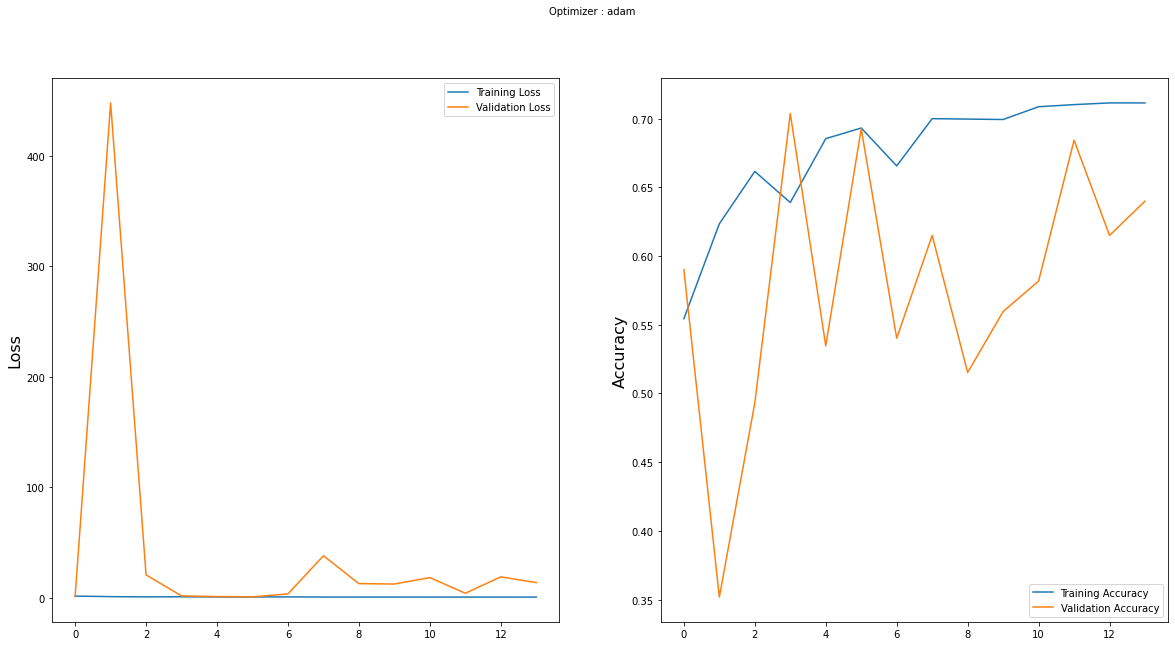

In [25]:
import matplotlib.pyplot as plt

x=hist3
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(x.history['loss'], label='Training Loss')
plt.plot(x.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(x.history['accuracy'], label='Training Accuracy')
plt.plot(x.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

# CNN

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, MaxPool2D, Dropout, Flatten
from tensorflow.keras.optimizers import Adam

In [27]:
model4 = Sequential()
model4.add(Conv2D(filters=32, kernel_size=(5,5), padding='same', activation='relu', input_shape=(128, 128, 3)))
model4.add(MaxPool2D(strides=2))
model4.add(Conv2D(filters=48, kernel_size=(5,5), padding='valid', activation='relu'))
model4.add(MaxPool2D(strides=2))
model4.add(Flatten())
model4.add(Dense(256, activation='relu'))
model4.add(Dense(84, activation='relu'))
model4.add(Dense(5, activation='softmax'))

In [28]:
model4.summary()
model4.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=["accuracy"])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 60, 60, 48)        38448     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 48)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 43200)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               11059456  
_________________________________________________________________
dense_4 (Dense)              (None, 84)                2

In [29]:
hist4 = model4.fit(train_set, validation_data=test_set, epochs=30, steps_per_epoch=len(train_set), validation_steps=len(test_set),callbacks=[learning_rate_reduction, early_stop])

Epoch 1/30
1615/1615 [==============================] - 14s 8ms/step - loss: 1.2542 - accuracy: 0.5178 - val_loss: 0.9371 - val_accuracy: 0.6842
Epoch 2/30
1615/1615 [==============================] - 13s 8ms/step - loss: 0.9452 - accuracy: 0.6686 - val_loss: 0.8805 - val_accuracy: 0.6704
Epoch 3/30
1615/1615 [==============================] - 14s 8ms/step - loss: 0.8857 - accuracy: 0.6884 - val_loss: 0.8619 - val_accuracy: 0.6759
Epoch 4/30
1615/1615 [==============================] - 13s 8ms/step - loss: 0.8445 - accuracy: 0.6959 - val_loss: 0.8475 - val_accuracy: 0.6898
Epoch 5/30
1615/1615 [==============================] - 13s 8ms/step - loss: 0.8248 - accuracy: 0.7046 - val_loss: 0.8172 - val_accuracy: 0.7008
Epoch 6/30
1615/1615 [==============================] - 13s 8ms/step - loss: 0.7965 - accuracy: 0.7120 - val_loss: 0.8246 - val_accuracy: 0.6953
Epoch 7/30
1615/1615 [==============================] - 13s 8ms/step - loss: 0.8150 - accuracy: 0.7104 - val_loss: 0.7943 - val_ac

In [74]:
y_pred = model4.predict(test_set,verbose=1,steps=len(test_set))
y_pred = np.argmax(y_pred,axis=1)
cm1=confusion_matrix(test_set.classes,y_pred)
print(cm1)

181/181 [==============================] - 1s 3ms/step
[[ 5 10 20  0  1]
 [18 18 59  0  4]
 [23 54 97  0  5]
 [ 4  8 16  0  0]
 [ 3  8  8  0  0]]


In [75]:
fpr, fnr, thresholds = metrics.roc_curve(test_set.classes,y_pred, pos_label=2)

In [76]:
dl4_acc = hist4.history["val_accuracy"]
dl4_prec = precision_score(test_set.classes,y_pred,average='weighted')
dl4_rec = recall_score(test_set.classes,y_pred,average='weighted')
dl4_f1 = f1_score(test_set.classes,y_pred,average='weighted')
dl4_fpr = 2*Average(fpr)
dl4_fnr = 2*Average(fnr)
dl4_spec = specificity_score(test_set.classes,y_pred,average='weighted')
dl4_sens = sensitivity_score(test_set.classes,y_pred,average='weighted')
dl4_kap = cohen_kappa_score(test_set.classes,y_pred)
dl4_roc = metrics.auc(fpr, fnr)

In [102]:
storeResults('CNN',dl4_acc[20],dl4_prec,dl4_rec,dl4_f1,dl4_fpr,dl4_fnr,dl4_spec,dl4_sens,dl4_kap,dl4_roc)

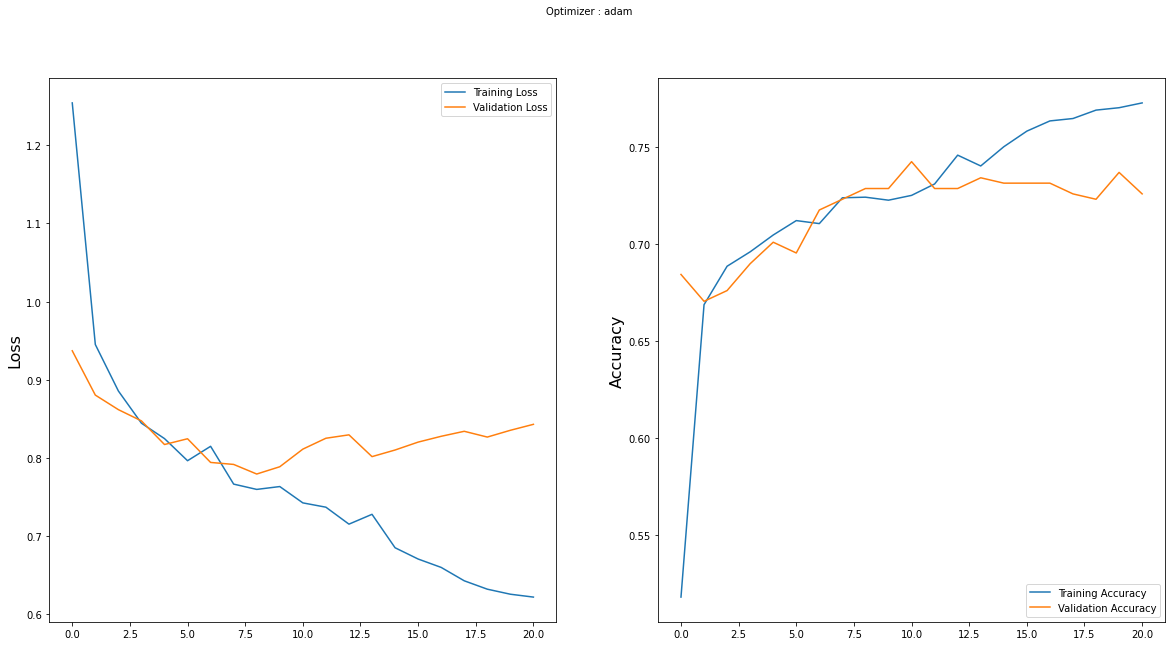

In [30]:
import matplotlib.pyplot as plt

x=hist4
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(x.history['loss'], label='Training Loss')
plt.plot(x.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(x.history['accuracy'], label='Training Accuracy')
plt.plot(x.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

# AlexNet

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization

In [32]:
np.random.seed(1000)

#Instantiation
AlexNet = Sequential()

#1st Convolutional Layer
AlexNet.add(Conv2D(filters=96, input_shape=(128,128,3), kernel_size=(11,11), strides=(4,4), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

#2nd Convolutional Layer
AlexNet.add(Conv2D(filters=256, kernel_size=(5, 5), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

#3rd Convolutional Layer
AlexNet.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))

#4th Convolutional Layer
AlexNet.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))

#5th Convolutional Layer
AlexNet.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

#Passing it to a Fully Connected layer
AlexNet.add(Flatten())
# 1st Fully Connected Layer
AlexNet.add(Dense(4096, input_shape=(32,32,3,)))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
# Add Dropout to prevent overfitting
AlexNet.add(Dropout(0.4))

#2nd Fully Connected Layer
AlexNet.add(Dense(4096))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
#Add Dropout
AlexNet.add(Dropout(0.4))

#3rd Fully Connected Layer
AlexNet.add(Dense(1000))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
#Add Dropout
AlexNet.add(Dropout(0.4))

#Output Layer
AlexNet.add(Dense(5))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('softmax'))

#Model Summary
AlexNet.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 32, 32, 96)        34944     
_________________________________________________________________
module_wrapper (ModuleWrappe (None, 32, 32, 96)        384       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 96)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 96)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 256)       614656    
_________________________________________________________________
module_wrapper_1 (ModuleWrap (None, 16, 16, 256)       1024      
_________________________________________________________________
activation_1 (Activation)    (None, 16, 16, 256)      

In [33]:
AlexNet.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=["accuracy"])

In [34]:
hist5 = AlexNet.fit(train_set, validation_data=test_set, epochs=30, steps_per_epoch=len(train_set), validation_steps=len(test_set),callbacks=[learning_rate_reduction, early_stop])

Epoch 1/30
1615/1615 [==============================] - 22s 13ms/step - loss: 1.4795 - accuracy: 0.4664 - val_loss: 1.8628 - val_accuracy: 0.3601
Epoch 2/30
1615/1615 [==============================] - 21s 13ms/step - loss: 1.3386 - accuracy: 0.4769 - val_loss: 1.8102 - val_accuracy: 0.4598
Epoch 3/30
1615/1615 [==============================] - 21s 13ms/step - loss: 1.3303 - accuracy: 0.4859 - val_loss: 1.2923 - val_accuracy: 0.4820
Epoch 4/30
1615/1615 [==============================] - 21s 13ms/step - loss: 1.2685 - accuracy: 0.4971 - val_loss: 1.2160 - val_accuracy: 0.5069
Epoch 5/30
1615/1615 [==============================] - 21s 13ms/step - loss: 1.2743 - accuracy: 0.4986 - val_loss: 1.5161 - val_accuracy: 0.3795
Epoch 6/30
1615/1615 [==============================] - 21s 13ms/step - loss: 1.2847 - accuracy: 0.4986 - val_loss: 1.2216 - val_accuracy: 0.4903
Epoch 7/30
1615/1615 [==============================] - 21s 13ms/step - loss: 1.2664 - accuracy: 0.4986 - val_loss: 1.2690 -

In [77]:
y_pred = AlexNet.predict(test_set,verbose=1,steps=len(test_set))
y_pred = np.argmax(y_pred,axis=1)
cm1=confusion_matrix(test_set.classes,y_pred)
print(cm1)

181/181 [==============================] - 1s 4ms/step
[[  0  13  23   0   0]
 [  0  41  58   0   0]
 [  0  61 118   0   0]
 [  0   9  19   0   0]
 [  0   9  10   0   0]]


In [78]:
fpr, fnr, thresholds = metrics.roc_curve(test_set.classes,y_pred, pos_label=2)

In [79]:
dl5_acc = hist5.history["val_accuracy"]
dl5_prec = precision_score(test_set.classes,y_pred,average='weighted')
dl5_rec = recall_score(test_set.classes,y_pred,average='weighted')
dl5_f1 = f1_score(test_set.classes,y_pred,average='weighted')
dl5_fpr = 2*Average(fpr)
dl5_fnr = 2*Average(fnr)
dl5_spec = specificity_score(test_set.classes,y_pred,average='weighted')
dl5_sens = sensitivity_score(test_set.classes,y_pred,average='weighted')
dl5_kap = cohen_kappa_score(test_set.classes,y_pred)
dl5_roc = metrics.auc(fpr, fnr)

In [103]:
storeResults('AlexNet',dl5_acc[26],dl5_prec,dl5_rec,dl5_f1,dl5_fpr,dl5_fnr,dl5_spec,dl5_sens,dl5_kap,dl5_roc)

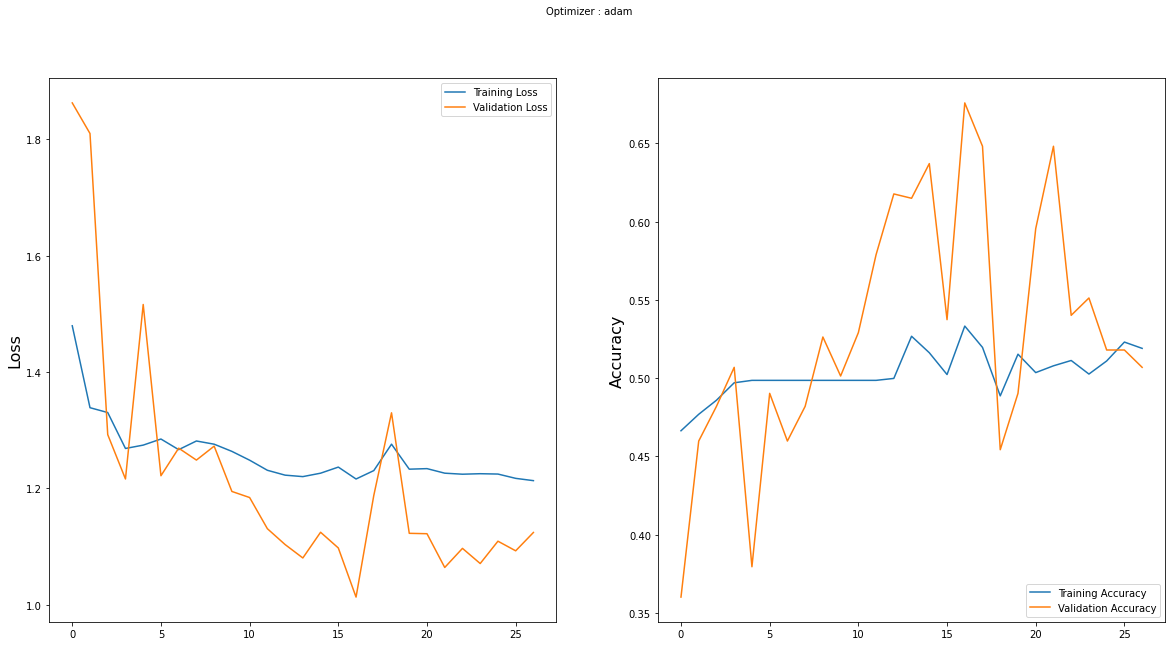

In [35]:
import matplotlib.pyplot as plt

x=hist5
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(x.history['loss'], label='Training Loss')
plt.plot(x.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(x.history['accuracy'], label='Training Accuracy')
plt.plot(x.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

# InceptionV3

In [36]:
# create the base pre-trained model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
base_model = InceptionV3(weights='imagenet', include_top=False)

# add a global spatial average pooling layer
x2 = base_model.output
x2 = GlobalAveragePooling2D()(x2)

predictions = Dense(5, activation='softmax')(x2)

# this is the model we will train
model6 = Model(inputs=base_model.input, outputs=predictions)
model6.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=["accuracy"])
model6.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv2d_7 (Conv2D)               (None, None, None, 3 864         input_4[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, None, None, 3 96          conv2d_7[0][0]                   
__________________________________________________________________________________________________
activation_9 (Activation)       (None, None, None, 3 0           batch_normalization[0][0]        
____________________________________________________________________________________________

In [37]:
hist6 = model6.fit(train_set, validation_data=test_set, epochs=30, steps_per_epoch=len(train_set), validation_steps=len(test_set),callbacks=[learning_rate_reduction, early_stop])

Epoch 1/30
1615/1615 [==============================] - 77s 45ms/step - loss: 1.4820 - accuracy: 0.4608 - val_loss: 1287.0321 - val_accuracy: 0.5485
Epoch 2/30
1615/1615 [==============================] - 72s 44ms/step - loss: 1.3766 - accuracy: 0.4698 - val_loss: 3.8969 - val_accuracy: 0.5540
Epoch 3/30
1615/1615 [==============================] - 71s 44ms/step - loss: 1.3092 - accuracy: 0.4906 - val_loss: 2.2712 - val_accuracy: 0.6510
Epoch 4/30
1615/1615 [==============================] - 71s 44ms/step - loss: 1.2685 - accuracy: 0.5045 - val_loss: 2.6708 - val_accuracy: 0.4017
Epoch 5/30
1615/1615 [==============================] - 72s 45ms/step - loss: 1.2679 - accuracy: 0.5039 - val_loss: 312.8452 - val_accuracy: 0.4931
Epoch 6/30
1615/1615 [==============================] - 70s 44ms/step - loss: 1.2150 - accuracy: 0.5389 - val_loss: 97.5271 - val_accuracy: 0.2909

Epoch 00006: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
Epoch 7/30
1615/1615 [===============

In [80]:
y_pred = model6.predict(test_set,verbose=1,steps=len(test_set))
y_pred = np.argmax(y_pred,axis=1)
cm1=confusion_matrix(test_set.classes,y_pred)
print(cm1)

181/181 [==============================] - 4s 16ms/step
[[  0  14  22   0   0]
 [  0  41  58   0   0]
 [  0  79 100   0   0]
 [  0   9  19   0   0]
 [  0   7  12   0   0]]


In [81]:
fpr, fnr, thresholds = metrics.roc_curve(test_set.classes,y_pred, pos_label=2)

In [82]:
dl6_acc = hist6.history["val_accuracy"]
dl6_prec = precision_score(test_set.classes,y_pred,average='weighted')
dl6_rec = recall_score(test_set.classes,y_pred,average='weighted')
dl6_f1 = f1_score(test_set.classes,y_pred,average='weighted')
dl6_fpr = 2*Average(fpr)
dl6_fnr = 2*Average(fnr)
dl6_spec = specificity_score(test_set.classes,y_pred,average='weighted')
dl6_sens = sensitivity_score(test_set.classes,y_pred,average='weighted')
dl6_kap = cohen_kappa_score(test_set.classes,y_pred)
dl6_roc = metrics.auc(fpr, fnr)

In [104]:
storeResults('InceptionV3',dl6_acc[12],dl6_prec,dl6_rec,dl6_f1,dl6_fpr,dl6_fnr,dl6_spec,dl6_sens,dl6_kap,dl6_roc)

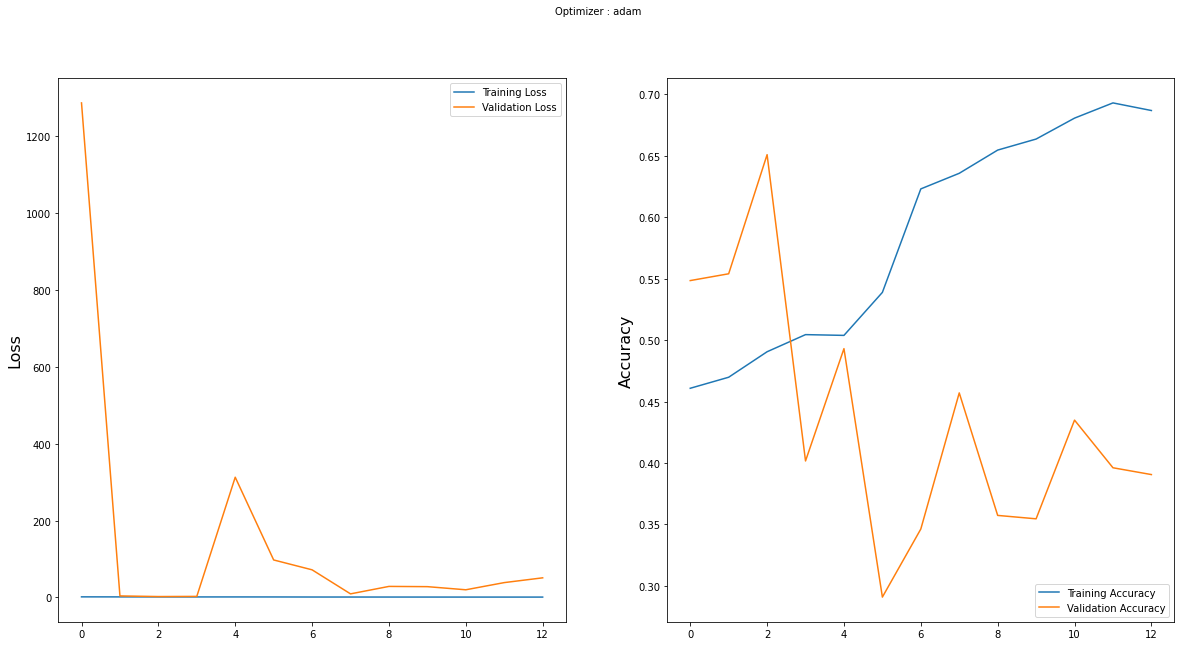

In [38]:
import matplotlib.pyplot as plt

x=hist6
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(x.history['loss'], label='Training Loss')
plt.plot(x.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(x.history['accuracy'], label='Training Accuracy')
plt.plot(x.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

# InceptionResnet-V2

In [39]:
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2

mob1 = InceptionResNetV2(input_shape = IMAGE_SIZE + [3], weights='imagenet', include_top=False)

x1= Flatten()(mob1.output)
prediction1 = Dense(5, activation='softmax')(x1)
model7 = Model(inputs = mob1.inputs, outputs = prediction1)
model7.summary()
model7.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=["accuracy"])

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
conv2d_101 (Conv2D)             (None, 63, 63, 32)   864         input_5[0][0]                    
__________________________________________________________________________________________________
batch_normalization_94 (BatchNo (None, 63, 63, 32)   96          conv2d_101[0][0]                 
__________________________________________________________________________________________________
activation_103 (Activation)     (None, 63, 63, 32)   0           batch_normalization_94[0][0]     
____________________________________________________________________________________________

In [40]:
hist7 = model7.fit(train_set, validation_data=test_set, epochs=30, steps_per_epoch=len(train_set), validation_steps=len(test_set),callbacks=[learning_rate_reduction, early_stop])

Epoch 1/30
1615/1615 [==============================] - 189s 111ms/step - loss: 1.9275 - accuracy: 0.5441 - val_loss: 3.5524 - val_accuracy: 0.6814
Epoch 2/30
1615/1615 [==============================] - 172s 107ms/step - loss: 1.4731 - accuracy: 0.6216 - val_loss: 260.9664 - val_accuracy: 0.1579
Epoch 3/30
1615/1615 [==============================] - 175s 108ms/step - loss: 1.3992 - accuracy: 0.6243 - val_loss: 7.8041 - val_accuracy: 0.6953
Epoch 4/30
1615/1615 [==============================] - 173s 107ms/step - loss: 1.1464 - accuracy: 0.6553 - val_loss: 110.6821 - val_accuracy: 0.5845
Epoch 5/30
1615/1615 [==============================] - 174s 108ms/step - loss: 1.1719 - accuracy: 0.6401 - val_loss: 7.3170 - val_accuracy: 0.5485
Epoch 6/30
1615/1615 [==============================] - 174s 108ms/step - loss: 1.1682 - accuracy: 0.6085 - val_loss: 14.2155 - val_accuracy: 0.5180

Epoch 00006: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
Epoch 7/30
1615/1615 [====

In [83]:
y_pred = model7.predict(test_set,verbose=1,steps=len(test_set))
y_pred = np.argmax(y_pred,axis=1)
cm1=confusion_matrix(test_set.classes,y_pred)
print(cm1)

181/181 [==============================] - 8s 37ms/step
[[  0  13  23   0   0]
 [  0  41  58   0   0]
 [  0  74 105   0   0]
 [  0  13  15   0   0]
 [  0   7  12   0   0]]


In [84]:
fpr, fnr, thresholds = metrics.roc_curve(test_set.classes,y_pred, pos_label=2)

In [85]:
dl7_acc = hist7.history["val_accuracy"]
dl7_prec = precision_score(test_set.classes,y_pred,average='weighted')
dl7_rec = recall_score(test_set.classes,y_pred,average='weighted')
dl7_f1 = f1_score(test_set.classes,y_pred,average='weighted')
dl7_fpr = 2*Average(fpr)
dl7_fnr = 2*Average(fnr)
dl7_spec = specificity_score(test_set.classes,y_pred,average='weighted')
dl7_sens = sensitivity_score(test_set.classes,y_pred,average='weighted')
dl7_kap = cohen_kappa_score(test_set.classes,y_pred)
dl7_roc = metrics.auc(fpr, fnr)

In [105]:
storeResults('InceptionResNetV2',dl7_acc[12],dl7_prec,dl7_rec,dl7_f1,dl7_fpr,dl7_fnr,dl7_spec,dl7_sens,dl7_kap,dl7_roc)

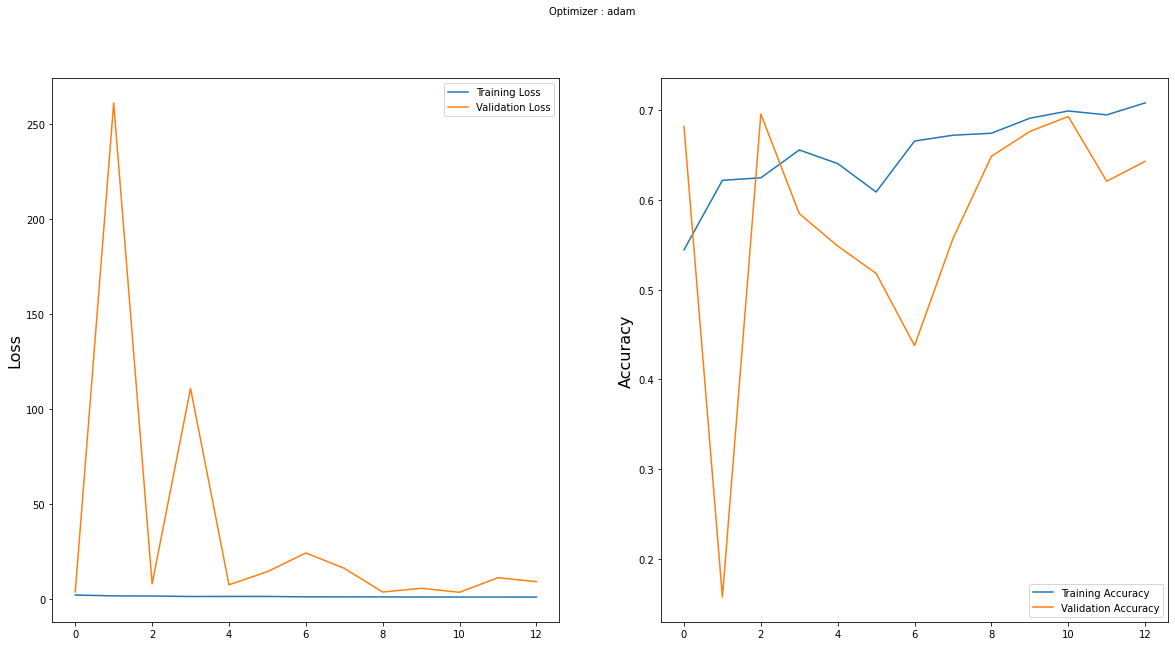

In [41]:
import matplotlib.pyplot as plt

x=hist7
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(x.history['loss'], label='Training Loss')
plt.plot(x.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(x.history['accuracy'], label='Training Accuracy')
plt.plot(x.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

# Deep Residual

In [42]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.activations import relu
from tensorflow.keras.layers import *
from tensorflow.keras import Model
from tensorflow.keras import layers as Layers

In [43]:
from functools import partial

DefaultConv2D = partial(tf.keras.layers.Conv2D, kernel_size=3, strides=1,
                        padding="same", kernel_initializer="he_normal",
                        use_bias=False)


In [44]:
class ResidualNet(tf.keras.layers.Layer):
    def __init__(self, filters, strides=1, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.activation = tf.keras.activations.get(activation)
        self.main_layers = [
            DefaultConv2D(filters, strides=strides),
            tf.keras.layers.BatchNormalization(),
            self.activation,
            DefaultConv2D(filters),
            tf.keras.layers.BatchNormalization()
        ]
        self.skip_layers = []
        if strides > 1:
            self.skip_layers = [
                DefaultConv2D(filters, kernel_size=1, strides=strides),
                tf.keras.layers.BatchNormalization()
            ]

    def call(self, inputs):
        Z = inputs
        for layer in self.main_layers:
            Z = layer(Z)
        skip_Z = inputs
        for layer in self.skip_layers:
            skip_Z = layer(skip_Z)
        return self.activation(Z + skip_Z)

In [45]:
model8 = tf.keras.Sequential([
    DefaultConv2D(64, kernel_size=7, strides=2, input_shape=[128, 128, 3]),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation("relu"),
    tf.keras.layers.MaxPool2D(pool_size=3, strides=2, padding="same"),
])

In [46]:
prev_filters = 64
for filters in [64] * 3 + [128] * 4 + [256] * 6 + [512] * 3:
    strides = 1 if filters == prev_filters else 2
    model8.add(ResidualNet(filters, strides=strides))
    prev_filters = filters

In [47]:
model8.add(tf.keras.layers.GlobalAvgPool2D())
model8.add(tf.keras.layers.Flatten())
model8.add(tf.keras.layers.Dense(5, activation="softmax"))

In [48]:
model8.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=["accuracy"])
model8.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_304 (Conv2D)          (None, 64, 64, 64)        9408      
_________________________________________________________________
batch_normalization_297 (Bat (None, 64, 64, 64)        256       
_________________________________________________________________
activation_306 (Activation)  (None, 64, 64, 64)        0         
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 32, 32, 64)        0         
_________________________________________________________________
residual_net (ResidualNet)   (None, 32, 32, 64)        74240     
_________________________________________________________________
residual_net_1 (ResidualNet) (None, 32, 32, 64)        74240     
_________________________________________________________________
residual_net_2 (ResidualNet) (None, 32, 32, 64)       

In [49]:
hist8 = model8.fit(train_set, validation_data=test_set, epochs=30, steps_per_epoch=len(train_set), validation_steps=len(test_set),callbacks=[learning_rate_reduction, early_stop])

Epoch 1/30
1615/1615 [==============================] - 36s 21ms/step - loss: 1.2052 - accuracy: 0.6126 - val_loss: 1.7443 - val_accuracy: 0.2798
Epoch 2/30
1615/1615 [==============================] - 34s 21ms/step - loss: 1.0209 - accuracy: 0.6510 - val_loss: 0.9724 - val_accuracy: 0.6787
Epoch 3/30
1615/1615 [==============================] - 33s 21ms/step - loss: 0.9462 - accuracy: 0.6649 - val_loss: 1.1097 - val_accuracy: 0.6565
Epoch 4/30
1615/1615 [==============================] - 34s 21ms/step - loss: 0.9014 - accuracy: 0.6776 - val_loss: 1.0624 - val_accuracy: 0.7036
Epoch 5/30
1615/1615 [==============================] - 34s 21ms/step - loss: 0.8705 - accuracy: 0.7005 - val_loss: 0.8562 - val_accuracy: 0.7064
Epoch 6/30
1615/1615 [==============================] - 34s 21ms/step - loss: 0.8448 - accuracy: 0.7030 - val_loss: 0.9498 - val_accuracy: 0.6814
Epoch 7/30
1615/1615 [==============================] - 34s 21ms/step - loss: 0.8156 - accuracy: 0.7148 - val_loss: 0.7573 -

In [86]:
y_pred = model8.predict(test_set,verbose=1,steps=len(test_set))
y_pred = np.argmax(y_pred,axis=1)
cm1=confusion_matrix(test_set.classes,y_pred)
print(cm1)

181/181 [==============================] - 2s 7ms/step
[[ 5 18 13  0  0]
 [ 5 41 53  0  0]
 [10 75 94  0  0]
 [ 1  7 20  0  0]
 [ 0 10  9  0  0]]


In [87]:
fpr, fnr, thresholds = metrics.roc_curve(test_set.classes,y_pred, pos_label=2)

In [88]:
dl8_acc = hist8.history["val_accuracy"]
dl8_prec = precision_score(test_set.classes,y_pred,average='weighted')
dl8_rec = recall_score(test_set.classes,y_pred,average='weighted')
dl8_f1 = f1_score(test_set.classes,y_pred,average='weighted')
dl8_fpr = 2*Average(fpr)
dl8_fnr = 2*Average(fnr)
dl8_spec = specificity_score(test_set.classes,y_pred,average='weighted')
dl8_sens = sensitivity_score(test_set.classes,y_pred,average='weighted')
dl8_kap = cohen_kappa_score(test_set.classes,y_pred)
dl8_roc = metrics.auc(fpr, fnr)

In [107]:
storeResults('Deep Residual Networks',dl8_acc[22],dl8_prec,dl8_rec,dl8_f1,dl8_fpr,dl8_fnr,dl8_spec,dl8_sens,dl8_kap,dl8_roc)

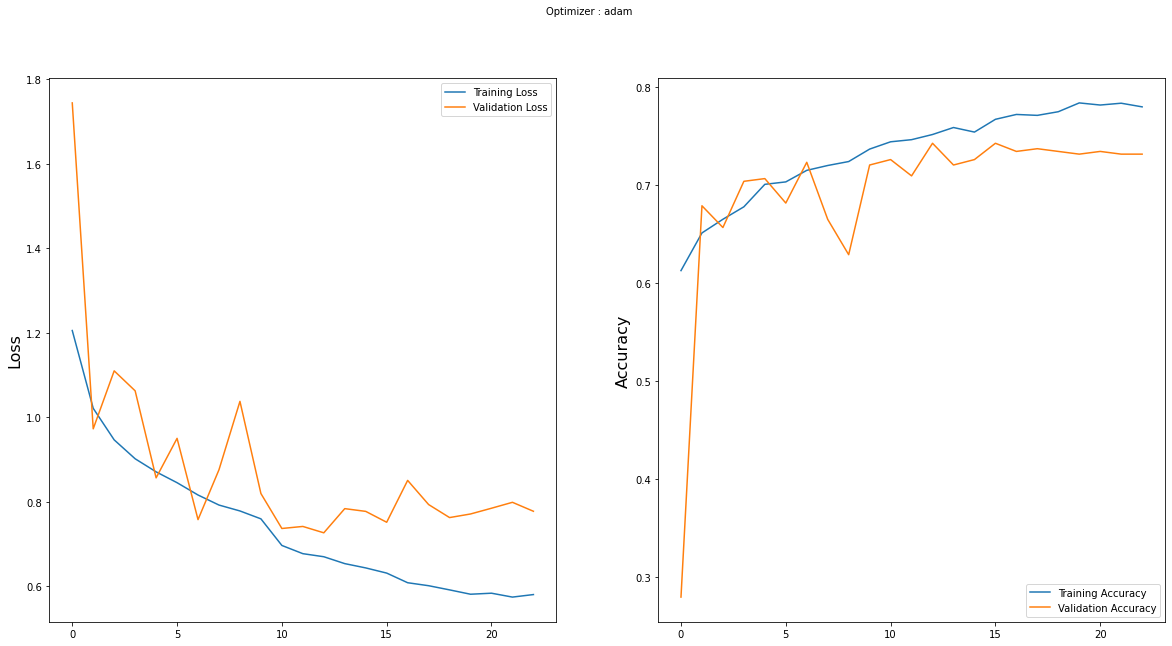

In [50]:
import matplotlib.pyplot as plt

x=hist8
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(x.history['loss'], label='Training Loss')
plt.plot(x.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(x.history['accuracy'], label='Training Accuracy')
plt.plot(x.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

# DenseNet201

In [51]:
from tensorflow.keras.applications import DenseNet201, DenseNet121

In [52]:
des201=DenseNet201(input_shape = IMAGE_SIZE + [3], weights='imagenet', include_top=False)

x1= Flatten()(des201.output)
prediction1 = Dense(5, activation='softmax')(x1)
model9 = Model(inputs = des201.inputs, outputs = prediction1)
model9.summary()
model9.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=["accuracy"])

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 134, 134, 3)  0           input_6[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 64, 64, 64)   9408        zero_padding2d[0][0]             
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 64, 64, 64)   256         conv1/conv[0][0]                 
____________________________________________________________________________________________

In [53]:
hist9 = model9.fit(train_set, validation_data=test_set, epochs=30, steps_per_epoch=len(train_set), validation_steps=len(test_set),callbacks=[learning_rate_reduction, early_stop])

Epoch 1/30
1615/1615 [==============================] - 195s 113ms/step - loss: 3.8207 - accuracy: 0.5135 - val_loss: 3.0950 - val_accuracy: 0.4238
Epoch 2/30
1615/1615 [==============================] - 180s 111ms/step - loss: 1.4328 - accuracy: 0.6321 - val_loss: 8.2084 - val_accuracy: 0.2133
Epoch 3/30
1615/1615 [==============================] - 178s 110ms/step - loss: 0.9252 - accuracy: 0.6801 - val_loss: 1.7425 - val_accuracy: 0.4709
Epoch 4/30
1615/1615 [==============================] - 175s 109ms/step - loss: 0.8789 - accuracy: 0.6875 - val_loss: 10.6618 - val_accuracy: 0.2632
Epoch 5/30
1615/1615 [==============================] - 176s 109ms/step - loss: 0.8213 - accuracy: 0.7067 - val_loss: 1.4715 - val_accuracy: 0.6371
Epoch 6/30
1615/1615 [==============================] - 182s 113ms/step - loss: 0.8046 - accuracy: 0.7120 - val_loss: 4.3363 - val_accuracy: 0.4986
Epoch 7/30
1615/1615 [==============================] - 178s 110ms/step - loss: 0.8217 - accuracy: 0.7067 - val

In [89]:
y_pred = model9.predict(test_set,verbose=1,steps=len(test_set))
y_pred = np.argmax(y_pred,axis=1)
cm1=confusion_matrix(test_set.classes,y_pred)
print(cm1)

181/181 [==============================] - 7s 31ms/step
[[  2  12  22   0   0]
 [ 15  20  62   0   2]
 [ 22  52 103   2   0]
 [  1  14  13   0   0]
 [  3   6  10   0   0]]


In [90]:
fpr, fnr, thresholds = metrics.roc_curve(test_set.classes,y_pred, pos_label=2)

In [91]:
dl9_acc = hist9.history["val_accuracy"]
dl9_prec = precision_score(test_set.classes,y_pred,average='weighted')
dl9_rec = recall_score(test_set.classes,y_pred,average='weighted')
dl9_f1 = f1_score(test_set.classes,y_pred,average='weighted')
dl9_fpr = 2*Average(fpr)
dl9_fnr = 2*Average(fnr)
dl9_spec = specificity_score(test_set.classes,y_pred,average='weighted')
dl9_sens = sensitivity_score(test_set.classes,y_pred,average='weighted')
dl9_kap = cohen_kappa_score(test_set.classes,y_pred)
dl9_roc = metrics.auc(fpr, fnr)

In [108]:
storeResults('DenseNet201',dl9_acc[29],dl9_prec,dl9_rec,dl9_f1,dl9_fpr,dl9_fnr,dl9_spec,dl9_sens,dl9_kap,dl9_roc)

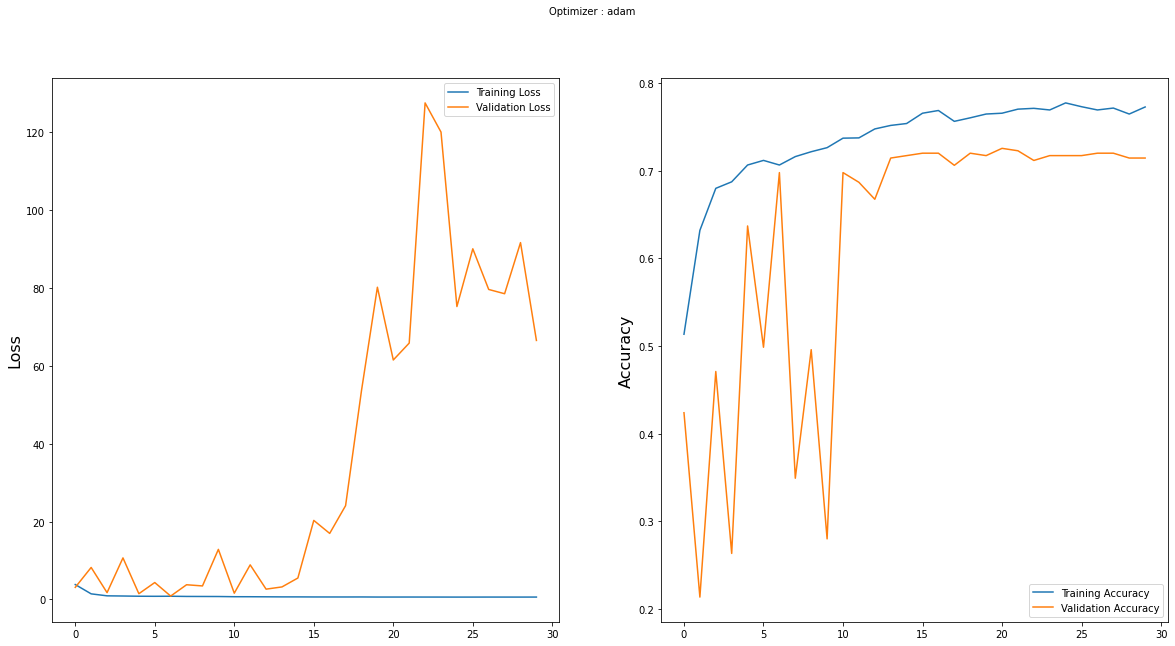

In [54]:
import matplotlib.pyplot as plt

x=hist9
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(x.history['loss'], label='Training Loss')
plt.plot(x.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(x.history['accuracy'], label='Training Accuracy')
plt.plot(x.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

# DenseNet121

In [55]:
des201=DenseNet121(input_shape = IMAGE_SIZE + [3], weights='imagenet', include_top=False)

x1= Flatten()(des201.output)
prediction1 = Dense(5, activation='softmax')(x1)
model10 = Model(inputs = des201.inputs, outputs = prediction1)
model10.summary()
model10.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=["accuracy"])

Model: "model_6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d_2 (ZeroPadding2D (None, 134, 134, 3)  0           input_7[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 64, 64, 64)   9408        zero_padding2d_2[0][0]           
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 64, 64, 64)   256         conv1/conv[0][0]                 
____________________________________________________________________________________________

In [56]:
hist10 = model10.fit(train_set, validation_data=test_set, epochs=30, steps_per_epoch=len(train_set), validation_steps=len(test_set),callbacks=[learning_rate_reduction, early_stop])

Epoch 1/30
1615/1615 [==============================] - 111s 65ms/step - loss: 3.6348 - accuracy: 0.5280 - val_loss: 19.5999 - val_accuracy: 0.2742
Epoch 2/30
1615/1615 [==============================] - 104s 64ms/step - loss: 1.6876 - accuracy: 0.6219 - val_loss: 3.9042 - val_accuracy: 0.6593
Epoch 3/30
1615/1615 [==============================] - 104s 65ms/step - loss: 1.1976 - accuracy: 0.6528 - val_loss: 1.0778 - val_accuracy: 0.6316
Epoch 4/30
1615/1615 [==============================] - 104s 65ms/step - loss: 0.9222 - accuracy: 0.6841 - val_loss: 1.4877 - val_accuracy: 0.6371
Epoch 5/30
1615/1615 [==============================] - 103s 64ms/step - loss: 0.8704 - accuracy: 0.6919 - val_loss: 3.5800 - val_accuracy: 0.4958

Epoch 00005: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
Epoch 6/30
1615/1615 [==============================] - 104s 64ms/step - loss: 0.7983 - accuracy: 0.7092 - val_loss: 0.9499 - val_accuracy: 0.6787
Epoch 7/30
1615/1615 [==============

In [92]:
y_pred = model10.predict(test_set,verbose=1,steps=len(test_set))
y_pred = np.argmax(y_pred,axis=1)
cm1=confusion_matrix(test_set.classes,y_pred)
print(cm1)

181/181 [==============================] - 4s 19ms/step
[[ 2 13 18  0  3]
 [ 2 40 57  0  0]
 [ 9 68 98  0  4]
 [ 2 15 11  0  0]
 [ 2  6 11  0  0]]


In [93]:
fpr, fnr, thresholds = metrics.roc_curve(test_set.classes,y_pred, pos_label=2)

In [94]:
dl10_acc = hist10.history["val_accuracy"]
dl10_prec = precision_score(test_set.classes,y_pred,average='weighted')
dl10_rec = recall_score(test_set.classes,y_pred,average='weighted')
dl10_f1 = f1_score(test_set.classes,y_pred,average='weighted')
dl10_fpr = 2*Average(fpr)
dl10_fnr = 2*Average(fnr)
dl10_spec = specificity_score(test_set.classes,y_pred,average='weighted')
dl10_sens = sensitivity_score(test_set.classes,y_pred,average='weighted')
dl10_kap = cohen_kappa_score(test_set.classes,y_pred)
dl10_roc = metrics.auc(fpr, fnr)

In [110]:
storeResults('DenseNet121',dl10_acc[20],dl10_prec,dl10_rec,dl10_f1,dl10_fpr,dl10_fnr,dl10_spec,dl10_sens,dl10_kap,dl10_roc)

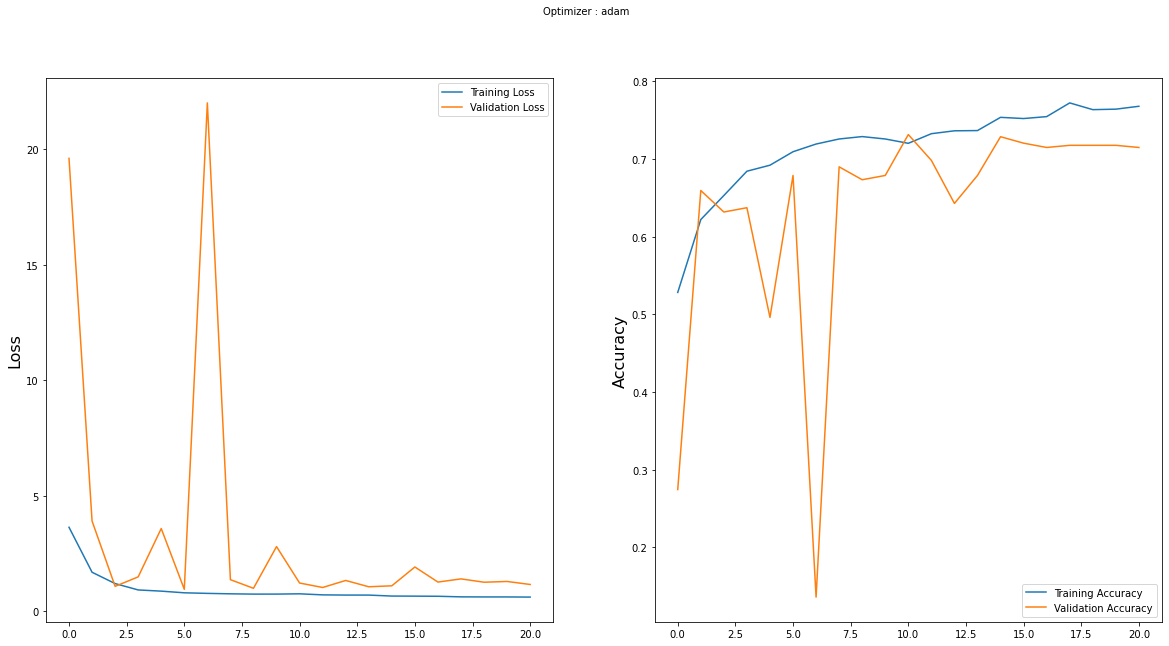

In [57]:
import matplotlib.pyplot as plt

x=hist10
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(x.history['loss'], label='Training Loss')
plt.plot(x.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(x.history['accuracy'], label='Training Accuracy')
plt.plot(x.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

# Xception

In [58]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, GlobalAveragePooling2D, Dropout
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.optimizers import Adam

In [59]:
# Defining the pretrained base model
base = Xception(include_top=False, weights='imagenet', input_shape=(128,128,3))
x = base.output
x = GlobalAveragePooling2D()(x)
# Defining the head of the model where the prediction is conducted
head = Dense(5, activation='softmax')(x)
# Combining base and head 
model11 = Model(inputs=base.input, outputs=head)

model11.compile(optimizer='sgd', 
              loss = 'categorical_crossentropy', 
              metrics=["accuracy"])

In [60]:
model11.summary()

Model: "model_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 63, 63, 32)   864         input_8[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 63, 63, 32)   128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 63, 63, 32)   0           block1_conv1_bn[0][0]            
____________________________________________________________________________________________

In [62]:
hist11 = model11.fit(train_set, validation_data=test_set, epochs=30, steps_per_epoch=len(train_set), validation_steps=len(test_set))

Epoch 1/30
181/181 [==============================] - 6s 33ms/step - loss: 0.2690 - accuracy: 0.8670 - val_loss: 0.3050 - val_accuracy: 0.8643
Epoch 2/30
181/181 [==============================] - 6s 32ms/step - loss: 0.2699 - accuracy: 0.8670 - val_loss: 0.2806 - val_accuracy: 0.8643
Epoch 3/30
181/181 [==============================] - 6s 32ms/step - loss: 0.2671 - accuracy: 0.8670 - val_loss: 0.2720 - val_accuracy: 0.8670
Epoch 4/30
181/181 [==============================] - 6s 32ms/step - loss: 0.2663 - accuracy: 0.8726 - val_loss: 0.2811 - val_accuracy: 0.8753
Epoch 5/30
181/181 [==============================] - 6s 33ms/step - loss: 0.2791 - accuracy: 0.8726 - val_loss: 0.2821 - val_accuracy: 0.8947
Epoch 6/30
181/181 [==============================] - 6s 32ms/step - loss: 0.2327 - accuracy: 0.9030 - val_loss: 0.2823 - val_accuracy: 0.9114
Epoch 7/30
181/181 [==============================] - 6s 32ms/step - loss: 0.2271 - accuracy: 0.9086 - val_loss: 0.2325 - val_accuracy: 0.9363

In [95]:
y_pred = model11.predict(test_set,verbose=1,steps=len(test_set))
y_pred = np.argmax(y_pred,axis=1)
cm1=confusion_matrix(test_set.classes,y_pred)
print(cm1)

181/181 [==============================] - 2s 7ms/step
[[ 4  8 20  2  2]
 [13 26 45 10  5]
 [13 54 88 14 10]
 [ 4  8 14  1  1]
 [ 2  4 11  1  1]]


In [96]:
fpr, fnr, thresholds = metrics.roc_curve(test_set.classes,y_pred, pos_label=2)

In [97]:
dl11_acc = hist11.history["val_accuracy"]
dl11_prec = precision_score(test_set.classes,y_pred,average='weighted')
dl11_rec = recall_score(test_set.classes,y_pred,average='weighted')
dl11_f1 = f1_score(test_set.classes,y_pred,average='weighted')
dl11_fpr = 2*Average(fpr)
dl11_fnr = 2*Average(fnr)
dl11_spec = specificity_score(test_set.classes,y_pred,average='weighted')
dl11_sens = sensitivity_score(test_set.classes,y_pred,average='weighted')
dl11_kap = cohen_kappa_score(test_set.classes,y_pred)
dl11_roc = metrics.auc(fpr, fnr)

In [111]:
storeResults('Xception',dl11_acc[29],dl11_prec,dl11_rec,dl11_f1,dl11_fpr,dl11_fnr,dl11_spec,dl11_sens,dl11_kap,dl11_roc)

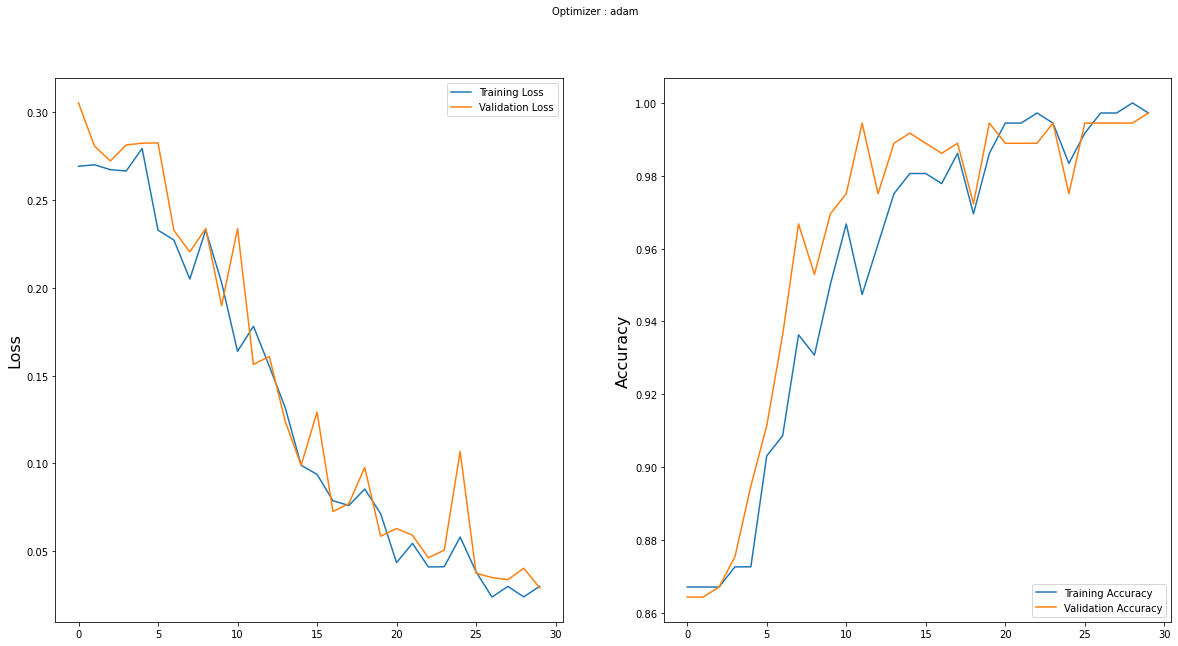

In [112]:
import matplotlib.pyplot as plt

x=hist11
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(x.history['loss'], label='Training Loss')
plt.plot(x.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(x.history['accuracy'], label='Training Accuracy')
plt.plot(x.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

# Comparison

In [113]:
#creating dataframe
import pandas as pd
result = pd.DataFrame({ 'ML Model' : ML_Model,
                        'Accuracy' : accuracy,
                       'Precision': precision,
                       'Recall'   : recall, 
                       'F1_score' : f1score,
                       'FPR' : fpr,
                       'FNR' : fnr,
                       'Specificity' : spec,
                       'Senstivity' : sens,
                       'Kappa Score' : kapa,
                       'ROC' : roc
                        
                      })

In [114]:
result

,ML Model,Accuracy,Precision,Recall,F1_score,FPR,FNR,Specificity,Senstivity,Kappa Score,ROC
0,ResNet50,0.720,0.318,0.357,0.336,0.956,0.974,0.623,0.357,-0.021,0.508
1,ResNet152,0.665,0.318,0.404,0.356,1.302,1.307,0.591,0.404,-0.008,0.507
2,ResNet101,0.615,0.334,0.418,0.369,1.037,1.043,0.611,0.418,0.033,0.505
3,CNN,0.726,0.300,0.332,0.315,0.982,0.988,0.619,0.332,-0.052,0.498
4,AlexNet,0.507,0.341,0.440,0.384,1.070,1.106,0.604,0.440,0.045,0.527
5,InceptionV3,0.391,0.310,0.391,0.345,1.073,1.039,0.583,0.391,-0.022,0.474
6,InceptionResNetV2,0.643,0.320,0.404,0.357,1.062,1.058,0.594,0.404,-0.001,0.497
7,Deep Residual Networks,0.731,0.345,0.388,0.361,1.231,1.235,0.621,0.388,0.012,0.503
8,DenseNet201,0.715,0.301,0.346,0.322,0.835,0.825,0.607,0.346,-0.054,0.493
9,DenseNet121,0.715,0.338,0.388,0.358,1.009,1.017,0.623,0.388,0.010,0.510


# Model Dumping

In [115]:
model11.save('model_apto.h5')

# Graph

In [116]:
classifier = ML_Model
y_pos = np.arange(len(classifier))

# Accuracy

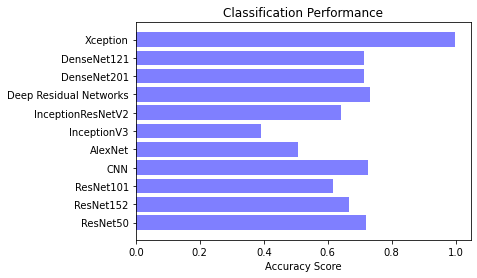

In [117]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, accuracy, align='center', alpha=0.5,color='blue')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Accuracy Score')
plt2.title('Classification Performance')
plt2.show()

# Precision

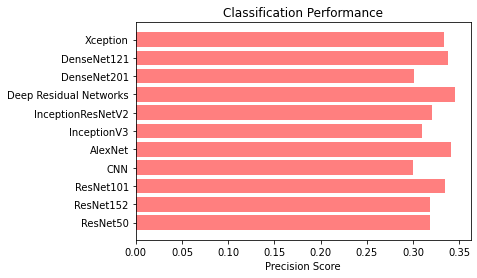

In [118]:
plt2.barh(y_pos, precision, align='center', alpha=0.5,color='red')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Precision Score')
plt2.title('Classification Performance')
plt2.show()

# Recall

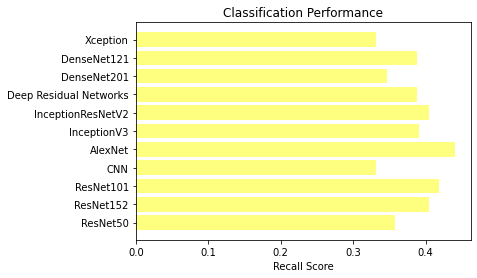

In [119]:
plt2.barh(y_pos, recall, align='center', alpha=0.5,color='yellow')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Recall Score')
plt2.title('Classification Performance')
plt2.show()

# F1 Score

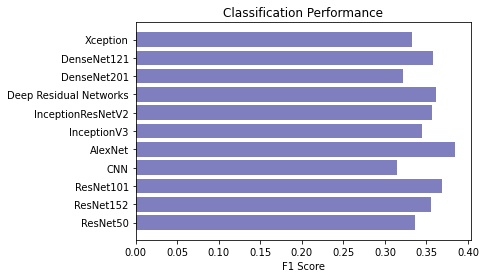

In [120]:
plt2.barh(y_pos, f1score, align='center', alpha=0.5,color='navy')
plt2.yticks(y_pos, classifier)
plt2.xlabel('F1 Score')
plt2.title('Classification Performance')
plt2.show()

# FPR

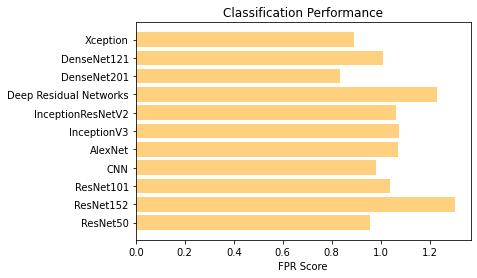

In [121]:
plt2.barh(y_pos, fpr, align='center', alpha=0.5,color='orange')
plt2.yticks(y_pos, classifier)
plt2.xlabel('FPR Score')
plt2.title('Classification Performance')
plt2.show()

# FNR

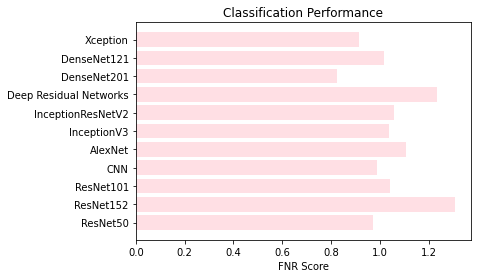

In [122]:
plt2.barh(y_pos, fnr, align='center', alpha=0.5,color='pink')
plt2.yticks(y_pos, classifier)
plt2.xlabel('FNR Score')
plt2.title('Classification Performance')
plt2.show()

# Specificity

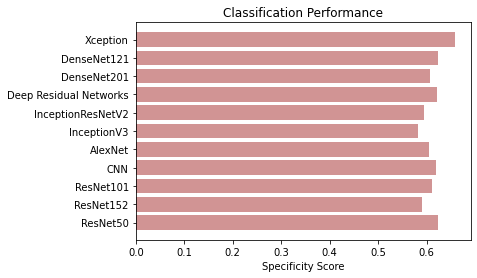

In [123]:
plt2.barh(y_pos, spec, align='center', alpha=0.5,color='brown')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Specificity Score')
plt2.title('Classification Performance')
plt2.show()

# Sensitivity

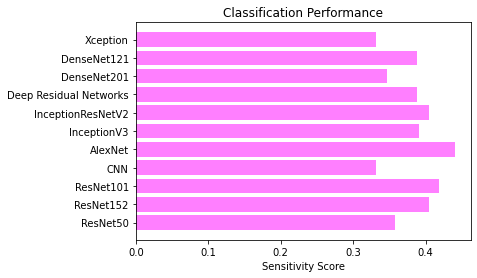

In [124]:
plt2.barh(y_pos, sens, align='center', alpha=0.5,color='magenta')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Sensitivity Score')
plt2.title('Classification Performance')
plt2.show()

# Kappa Score

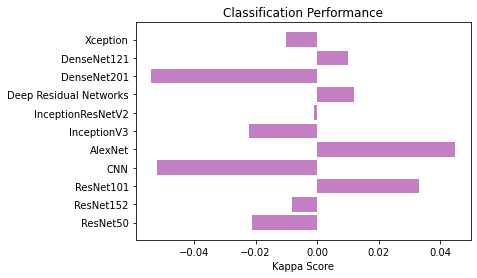

In [125]:
plt2.barh(y_pos, kapa, align='center', alpha=0.5,color='darkmagenta')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Kappa Score')
plt2.title('Classification Performance')
plt2.show()

# ROC

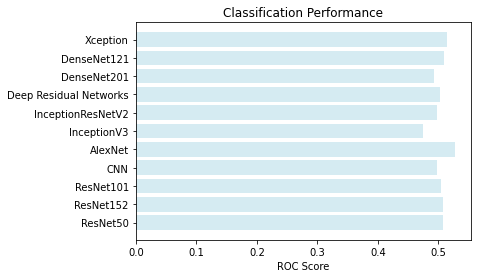

In [126]:
plt2.barh(y_pos, roc, align='center', alpha=0.5,color='lightblue')
plt2.yticks(y_pos, classifier)
plt2.xlabel('ROC Score')
plt2.title('Classification Performance')
plt2.show()